In [ ]:
%load_ext autoreload
%autoreload 2

%cd /home/arthur/code/startml/DL/3_cnn/

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

import data
import train
import model


In [4]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BASE_DIR = os.path.abspath(os.getcwd())
DATA_DIR = os.path.abspath(f'{BASE_DIR}/data')
MODEL_DIR = os.path.abspath(f'{BASE_DIR}/model')
CIFAR10_DIR = os.path.abspath(f'{DATA_DIR}/CIFAR10')

INPUT_SIZE = (32, 32)
OUTPUT_SIZE = 10
BATCH_SIZE = 64  
LR = 0.01              
NUM_EPOCHS = 20
EARLY_STOPPING = None

transform_train = transforms.Compose([
        transforms.Resize(INPUT_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(degrees=30),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])

transform_val = transforms.Compose([
        transforms.Resize(INPUT_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
    ])


train_dataset, test_dataset = data.get_dataset(datasets.CIFAR10, transform_train, transform_val, CIFAR10_DIR)
train_loader, test_loader = data.get_dataloaders(train_dataset, test_dataset, BATCH_SIZE)

net = model.create_resnet18().to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=LR)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=LR, steps_per_epoch=1, epochs=NUM_EPOCHS)

train_loss_hist, train_acc_hist, val_loss_hist, val_acc_hist = train.fit_model(
    model=net, 
    num_epochs=NUM_EPOCHS, 
    scheduler=scheduler, 
    train_loader=train_loader, 
    test_loader=test_loader, 
    optimizer=optimizer, 
    criterion=criterion, 
    early_stopping=EARLY_STOPPING,
    device=DEVICE,
    model_dir=MODEL_DIR,
    model_name='resnet18'
)

train_dataset_tta, test_dataset_tta = data.get_dataset(datasets.CIFAR10, transform_train, transform_val, CIFAR10_DIR, tta=True)
_, test_loader_tta = data.get_dataloaders(train_dataset_tta, test_dataset_tta, BATCH_SIZE)
total_preds, accuracy = train.predict_tta(net, test_loader_tta, device=DEVICE, iterations=5)

[INFO] [train] Epoch 1 / 20
[INFO] [train] Learning rate: 0.0004


Training: 100%|██████████| 782/782 [00:34<00:00, 22.56it/s, loss=1.49]

[INFO] [train] Train accuracy: 45.44% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.92it/s, loss=1.12]

[INFO] [train] Validation accuracy: 59.54% 

[INFO] [train] Epoch 2 / 20
[INFO] [train] Learning rate: 0.00132



Training: 100%|██████████| 782/782 [00:34<00:00, 22.74it/s, loss=1.28]

[INFO] [train] Train accuracy: 53.98% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.77it/s, loss=1.08]

[INFO] [train] Validation accuracy: 62.60% 



[INFO] [train] Epoch 3 / 20
[INFO] [train] Learning rate: 0.00372


Training: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s, loss=1.17]

[INFO] [train] Train accuracy: 58.41% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.12it/s, loss=0.996]

[INFO] [train] Validation accuracy: 63.79% 



[INFO] [train] Epoch 4 / 20
[INFO] [train] Learning rate: 0.00668


Training: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s, loss=1.02]

[INFO] [train] Train accuracy: 64.22% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.30it/s, loss=0.825]

[INFO] [train] Validation accuracy: 71.51% 



[INFO] [train] Epoch 5 / 20
[INFO] [train] Learning rate: 0.00908


Training: 100%|██████████| 782/782 [00:34<00:00, 22.54it/s, loss=0.924]

[INFO] [train] Train accuracy: 67.67% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.39it/s, loss=0.761]

[INFO] [train] Validation accuracy: 74.39% 



[INFO] [train] Epoch 6 / 20
[INFO] [train] Learning rate: 0.01


Training: 100%|██████████| 782/782 [00:34<00:00, 22.67it/s, loss=0.831]

[INFO] [train] Train accuracy: 71.00% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.87it/s, loss=0.69] 

[INFO] [train] Validation accuracy: 77.00% 



[INFO] [train] Epoch 7 / 20
[INFO] [train] Learning rate: 0.00987


Training: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s, loss=0.761]

[INFO] [train] Train accuracy: 73.57% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.06it/s, loss=0.569]

[INFO] [train] Validation accuracy: 80.66% 



[INFO] [train] Epoch 8 / 20
[INFO] [train] Learning rate: 0.0095


Training: 100%|██████████| 782/782 [00:34<00:00, 22.58it/s, loss=0.7]  

[INFO] [train] Train accuracy: 75.67% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.31it/s, loss=0.608]

[INFO] [train] Validation accuracy: 79.37% 

[INFO] [train] Epoch 9 / 20
[INFO] [train] Learning rate: 0.00891



Training: 100%|██████████| 782/782 [00:34<00:00, 22.57it/s, loss=0.646]

[INFO] [train] Train accuracy: 77.74% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.31it/s, loss=0.537]

[INFO] [train] Validation accuracy: 81.92% 



[INFO] [train] Epoch 10 / 20
[INFO] [train] Learning rate: 0.00812


Training: 100%|██████████| 782/782 [00:34<00:00, 22.57it/s, loss=0.598]

[INFO] [train] Train accuracy: 79.35% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.29it/s, loss=0.492]

[INFO] [train] Validation accuracy: 83.64% 



[INFO] [train] Epoch 11 / 20
[INFO] [train] Learning rate: 0.00717


Training: 100%|██████████| 782/782 [00:34<00:00, 22.58it/s, loss=0.554]

[INFO] [train] Train accuracy: 80.59% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.32it/s, loss=0.446]

[INFO] [train] Validation accuracy: 84.36% 



[INFO] [train] Epoch 12 / 20
[INFO] [train] Learning rate: 0.00611


Training: 100%|██████████| 782/782 [00:34<00:00, 22.57it/s, loss=0.501]

[INFO] [train] Train accuracy: 82.64% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.39it/s, loss=0.411]

[INFO] [train] Validation accuracy: 86.00% 



[INFO] [train] Epoch 13 / 20
[INFO] [train] Learning rate: 0.005


Training: 100%|██████████| 782/782 [00:34<00:00, 22.56it/s, loss=0.454]

[INFO] [train] Train accuracy: 83.94% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.31it/s, loss=0.363]

[INFO] [train] Validation accuracy: 87.62% 



[INFO] [train] Epoch 14 / 20
[INFO] [train] Learning rate: 0.00389


Training: 100%|██████████| 782/782 [00:34<00:00, 22.56it/s, loss=0.41] 

[INFO] [train] Train accuracy: 85.78% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.39it/s, loss=0.365]

[INFO] [train] Validation accuracy: 87.81% 



[INFO] [train] Epoch 15 / 20
[INFO] [train] Learning rate: 0.00283


Training: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s, loss=0.363]

[INFO] [train] Train accuracy: 87.23% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 62.38it/s, loss=0.323]

[INFO] [train] Validation accuracy: 88.88% 



[INFO] [train] Epoch 16 / 20
[INFO] [train] Learning rate: 0.00188


Training: 100%|██████████| 782/782 [00:34<00:00, 22.64it/s, loss=0.322]

[INFO] [train] Train accuracy: 88.78% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 63.30it/s, loss=0.308]

[INFO] [train] Validation accuracy: 89.82% 



[INFO] [train] Epoch 17 / 20
[INFO] [train] Learning rate: 0.00109


Training: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s, loss=0.291]

[INFO] [train] Train accuracy: 89.74% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 63.33it/s, loss=0.288]

[INFO] [train] Validation accuracy: 90.21% 



[INFO] [train] Epoch 18 / 20
[INFO] [train] Learning rate: 0.0005


Training: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s, loss=0.26] 

[INFO] [train] Train accuracy: 90.87% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 63.23it/s, loss=0.28] 

[INFO] [train] Validation accuracy: 90.66% 



[INFO] [train] Epoch 19 / 20
[INFO] [train] Learning rate: 0.00013


Training: 100%|██████████| 782/782 [00:34<00:00, 22.80it/s, loss=0.251]

[INFO] [train] Train accuracy: 91.28% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 63.21it/s, loss=0.278]

[INFO] [train] Validation accuracy: 90.88% 



[INFO] [train] Epoch 20 / 20
[INFO] [train] Learning rate: 0.0


Training: 100%|██████████| 782/782 [00:34<00:00, 22.81it/s, loss=0.248]

[INFO] [train] Train accuracy: 91.38% 




Validation: 100%|██████████| 157/157 [00:02<00:00, 63.25it/s, loss=0.278]

[INFO] [train] Validation accuracy: 90.79% 




TTA Prediction 5: 100%|██████████| 157/157 [00:02<00:00, 59.41it/s]

[INFO] [train] TTA Test accuracy: 90.40% 



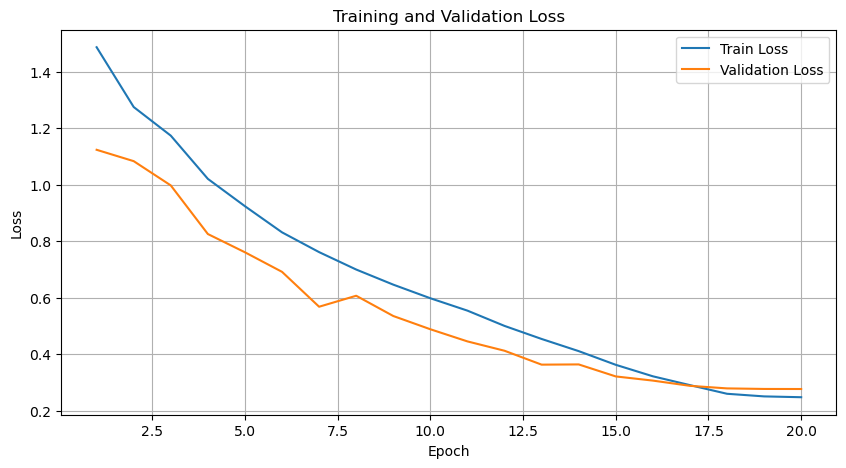

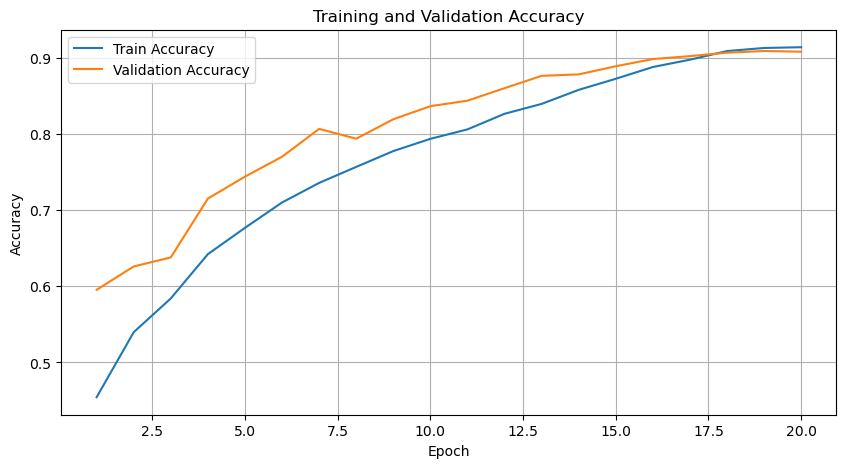

In [5]:
# Plot metrics
epochs = np.arange(1, NUM_EPOCHS + 1)
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss_hist, label='Train Loss')
plt.plot(epochs, val_loss_hist, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
# plt.savefig('loss_plot.png')
# plt.close()

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc_hist, label='Train Accuracy')
plt.plot(epochs, val_acc_hist, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
# plt.savefig('accuracy_plot.png')
# plt.close()

In [6]:
torch.save(total_preds, 'tta_preds_resnet_one_cycle.pt')

In [21]:
import torch

# Define tensors
y_pred = torch.tensor([
    [1, 1, 2, 2, 2],
    [1, 1, 2, 1, 2],
    [1, 0, 0, 0, 0],
    [2, 2, 2, 0, 0],
    [2, 1, 1, 1, 2]
], dtype=torch.int32)

y_true = torch.tensor([
    [1, 1, 1, 2, 2],
    [1, 1, 1, 2, 2],
    [1, 1, 1, 2, 2],
    [0, 0, 0, 2, 2],
    [0, 0, 0, 2, 2]
], dtype=torch.int32)

# Calculate Jaccard index for each class
class_jaccard = []
num_classes = torch.max(y_true) + 1

for class_id in range(num_classes):
    intersection = torch.sum((y_pred == class_id) & (y_true == class_id))
    union = torch.sum((y_pred == class_id) | (y_true == class_id))
    jaccard = intersection.item() / union.item()
    class_jaccard.append(jaccard)

# Calculate mean Jaccard index
mean_jaccard = torch.tensor(class_jaccard).mean().item()

print("Jaccard index for each class (including background):", class_jaccard)
print("Mean Jaccard index:", mean_jaccard)


Jaccard index for each class (including background): [0.0, 0.38461538461538464, 0.25]
Mean Jaccard index: 0.21153847873210907


In [19]:
y_pred[y_pred == 1]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)